In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
class LDA:
  def __init__(self,n_components):
    self.n_components = n_components
    self.linear_discriminants = None

  def fit(self,X,y):
    n_features = X.shape[1]
    class_labels = np.unique(y)

    # Calculate S_w and S_b
    S_w = np.zeros((n_features,n_features))
    S_b = np.zeros((n_features,n_features))

    for c in class_labels:
      # Calculate S_w
      X_c = X[y == c] # Samples of class 'c'
      mean_c = np.mean(X_c,axis = 0)
      S_w += ((X_c - mean_c).T).dot(X_c - mean_c)
  
      # Calculate S_b
      mean_overall = np.mean(X,axis = 0)
      n_c = X_c.shape[0] 
      mean_diff = (mean_c - mean_overall).reshape(n_features,1)
      S_b += n_c * (mean_diff).dot(mean_diff.T)

    A = np.linalg.inv(S_w).dot(S_b)
    # Get eigenvalues and eigenvectors of SW^-1 * SB
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # -> eigenvector v = [:,i] column vector, transpose for easier calculations
    # sort eigenvalues high to low
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    # store first n eigenvectors
    self.linear_discriminants = eigenvectors[0:self.n_components]

  def transform(self,X): # Get features
    # project data into linear discriminants
    # transpose as we transposed eigenvectors for easier calculations
    return np.dot(X, self.linear_discriminants.T) 

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


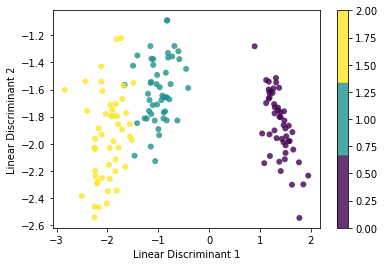

In [13]:
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()